## Ljung-Box 테스트

In [ ]:
# 귀무가설 (H₀)	"시계열에 자기상관이 없다." 즉, 특정 lag까지의 관측값들 간에는 통계적으로 유의한 상관관계가 없다는 의미입니다.
# --> 시계열이 백색잡음(white noise)라고 판단합니다.
# 대립가설 (H₁)	"시계열에 자기상관이 존재한다." 즉, 과거의 값이 현재 값에 영향을 줄 수 있다는 의미입니다.
# --> 시계열이 완전히 무작위는 아니며 패턴이나 구조가 존재한다고 해석합니다.

      lb_stat  lb_pvalue
1    0.708002   0.400108
2   11.073727   0.003939
3   11.510226   0.009264
4   11.602354   0.020567
5   11.885581   0.036390
6   14.940677   0.020723
7   15.076272   0.035034
8   15.306700   0.053449
9   16.185798   0.063102
10  17.958206   0.055673


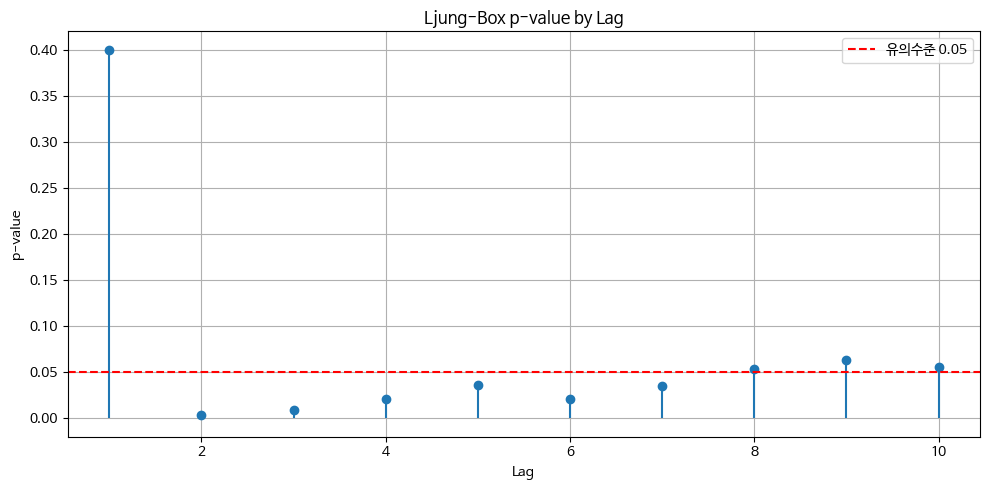

In [3]:
import pandas as pd
from pykrx import stock
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 일간 수익률 계산
df['return'] = df['종가'].pct_change()
df.dropna(inplace=True)

# 3. Ljung-Box 테스트 수행 (lag 10까지)
ljung_box_result = acorr_ljungbox(df['return'], lags=10, return_df=True)
print(ljung_box_result)

# 4. 시각화
plt.figure(figsize=(10, 5))
plt.stem(ljung_box_result.index, ljung_box_result['lb_pvalue'], basefmt=" ")
plt.axhline(y=0.05, color='r', linestyle='--', label='유의수준 0.05')
plt.title('Ljung-Box p-value by Lag')
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Lag	Ljung-Box 통계량	p-value	해석
# 1	0.7080	0.4001	자기상관 없음 (유의하지 않음)
# 2	11.0737	0.0039	자기상관 있음 (유의함)
# 3	11.5102	0.0092	자기상관 있음
# 4	11.6024	0.0206	자기상관 있음
# 5	11.8856	0.0364	자기상관 있음
# 6	14.9407	0.0207	자기상관 있음
# 7	15.0763	0.0350	자기상관 있음
# 8	15.3067	0.0534	유의수준 근처, 경계적 (약함)
# 9	16.1858	0.0631	자기상관 없음 (유의하지 않음)
# 10	17.9582	0.0557	자기상관 없음 (경계적)



In [ ]:
# 초기 시차(2~7)**에서 자기상관이 유의미하게 존재합니다. → 해당 구간의 수익률에는 과거 패턴의 영향이 일부 존재할 수 있음을 시사.
# 후반부 (lag 8~10)는 p-value가 0.05보다 크거나 경계 수준이므로, 자기상관이 유의하지 않다고 판단할 수 있습니다.
# 이는 완전한 백색 잡음(무작위성)은 아니며, 초기 몇 시차에 예측 정보가 있을 가능성을 의미합니다.